Ampliación de Matemáticas. Aproximación de raíces. 

Por Pablo Angulo y Fabricio Macià para ETSIN@UPM.

# Aproximación de raíces, puntos fijos y optimización de funciones en una variable

Vamos a practicar diversas técnicas para encontrar ceros (raíces) de funciones no lineales de una variable real.

Comenzamos por un ejemplo sencillo:
$$
f(x) = x + \frac{1}{2}\sin(x) -1.
$$

 - Dibujemos la función cuyas raíces queremos calcular.

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from scipy.optimize import minimize_scalar, bisect, newton


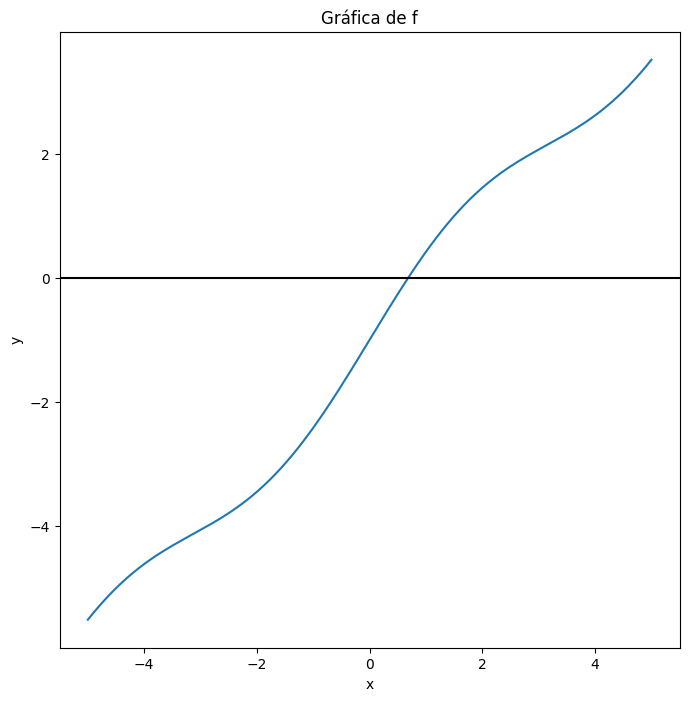

In [2]:
def f(x):
    return x + np.sin(x)/2 - 1

xmin = -5
xmax = 5
xs = np.linspace(xmin, xmax,200)
ys = f(xs)
plt.figure(figsize=(8,8))
plt.plot(xs, ys)
plt.title('Gráfica de f')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(color='k')
plt.show()

Observar las funciones nos puede dar pistas sobre el número y ubicación aproximada de las raíces, pero necesitamos demostrar la existencia y unicidad con alguna de estas técnicas:

 - Si la función es continua, y en un intervalo cambia de signo, tiene que haber una raíz en ese intervalo (_teorema de Bolzano_).
 - Si en un intervalo la derivada no cambia de signo, no puede haber más de una raíz (consecuencia del _teorema de Rolle_).

En este caso concreto, tenemos un cambio de signo en el intervalo (-1,1), luego hay una raíz de $f$:

In [3]:
f(-1), f(1)

(-2.4207354924039484, 0.42073549240394836)

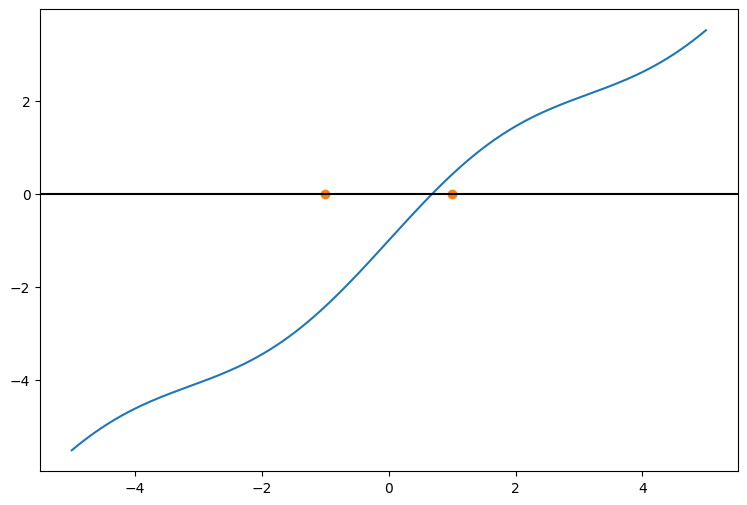

In [4]:
plt.figure(figsize=(9,6))
plt.plot(xs,ys)
xleft = -1
xright = 1

plt.plot([xleft, xright], [0,0], 'o')
plt.axhline(color='k')
plt.show()

La derivada de $f$ es fácil de calcular:
$$
f'(x) = 1 + \frac{1}{2}\cos(x)
$$
y podemos acotarla fácilmente por debajo si escribimos:
$$
1 = f'(x) - \frac{1}{2}\cos(x)
$$
y usando la desigualdad triangular:
$$
1 \leq |f'(x)| + \frac{1}{2}|\cos(x)|
$$
luego
$$
|f'(x)| \geq 1 - \frac{1}{2}|\cos(x)| \geq 1 - \frac{1}{2} =  \frac{1}{2} > 0
$$
Es decir, $f'$ no se anula nunca. Como $f'(0)>0$ y $f'$ no cambia de signo, $f'$ siempre es positiva, luego $f$ es creciente en todo $\mathbb{R}$, luego $f$ tiene sólo una raíz.

Ahora bien, encontrar esa raíz de forma exacta no es posible, y nos tenemos que contentar con aproximarla.


## Método de la bisección

 - OBJETIVO: Encontrar un intervalo [x1, x2] tal que hay una raíz x* de f en ese intervalo.
 - INICIO: Partimos de un intervalo `[xleft, xright]` donde $f$ cambia de signo.
 - REPITE: Evalúa $f$ en `xmed = (xleft + xright)/2`. Nos quedamos con un nuevo intervalo donde hay un cambio de signo y de longitud la mitad que el anterior.
 - HASTA QUE: Terminamos cuando el intervalo obtenido tenga longitud menor que `xtol`.

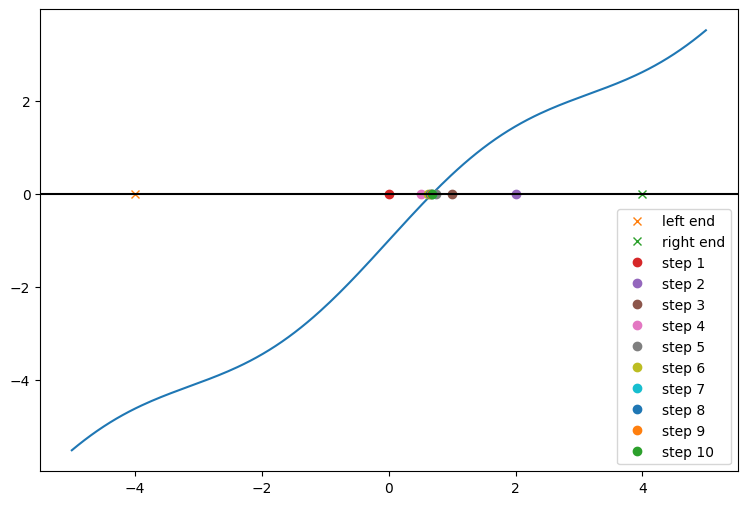

In [5]:
plt.figure(figsize=(9,6))
plt.plot(xs,ys)

xleft  = -4
xright = 4
xtol = 1e-2
plt.plot([xleft], [ 0], 'x', label='left end')
plt.plot([xright], [0], 'x', label='right end')


j = 1
sleft  = np.sign(f(xleft))
sright = np.sign(f(xright))
while xright - xleft > xtol:
    xmed = (xleft + xright)/2
    smed = np.sign(f(xmed))
    if smed==sleft:
        xleft = xmed
    else:
        xright = xmed
    plt.plot([xmed], [0], 'o', label='step %d'%j)
    j = j + 1

plt.legend()
plt.axhline(color='k')
plt.show()

## Error en el método de la bisección

Recuerda que en cada paso del método de la bisección obtenemos un nuevo valor $x_n$ (el punto medio del intervalo que se subdivide), que pasa a ser uno de los extremos del nuevo intervalo que se subdividirá en la etapa siguiente. 

Por ejemplo, en la primera iteración 

$$
x_1=\frac{a+b}{2}.
$$

El error en la iteración $n$ es: 

$$
e_n=x_n-x_*,\quad \text{ siendo } f(x_*)=0.
$$

Sabemos, por como se han construido las iteraciones,  que:

$$
|e_n|\leq \frac{b-a}{2^n};
$$

en particular, esto sugiere que el error en la etapa $n+1$ y el error en la etapa $n$ se relacionan por:

$$
|e_{n+1}| \approx \frac{1}{2}|e_n|.
$$



Ventajas:
- Siempre converge.

Inconvenientes:
- Sólo se puede aplicar si tenemos dos aproximaciones de la raíz en las que $f$ toma valores de signo opuesto (inconveniente menor).
- Suele converger más lentamente que otros métodos (inconveniente mayor).

### Ejercicio

Empaqueta el método de bisección como una función con entradas:

 - Una función `f` continua
 - Los extremos de un intervalo `a` y `b`.
 - Una tolerancia para el error `xtol`

y salidas

 - Si `f(a)*f(b)>0`, se rompe y no devuelve nada (imprime un mensaje de error, lanza una "excepción", etc)
 - Si `f(a)*f(b)<=0`, devuelve un valor que dista de la raíz de `f` menos que `xtol`

In [6]:
def biseccion(f,a,b,xtol=1e-6):
    xleft,xright = a,b
    j = 1
    sleft  = np.sign(f(xleft))
    sright = np.sign(f(xright))
    # si no hay cambio de signo, lanzamos una excepción
    if sleft == sright:
        raise Exception('No hay cambio de signo => no se puede usar el método de bisección')
    while xright - xleft > xtol:
        xmed = (xleft + xright)/2
        smed = np.sign(f(xmed))
        if smed==sleft:
            xleft = xmed
        else:
            xright = xmed
        j = j + 1
    # devolvemos una estimación de la raíz y una estimación del error
    return (xleft + xright)/2, (xright - xleft)/2


In [7]:
biseccion(f,-1,1)

(0.6840367317199707, 4.76837158203125e-07)

In [8]:
biseccion(f,1,4)

Exception: No hay cambio de signo => no se puede usar el método de bisección

### Ejercicio

- Busca ahora las raíces de 

$$
f(x) = x^3 - 4x + \log(1+x^2)
$$
  Atención: ¿hay más de una raíz? ¿cuántas son positivas?

In [9]:
def f(x):
    return (x**3 - 4*x) + np.log(1+x**2)

xmin = -3
xmax = 3

Dibujamos la función para hacernos una idea.

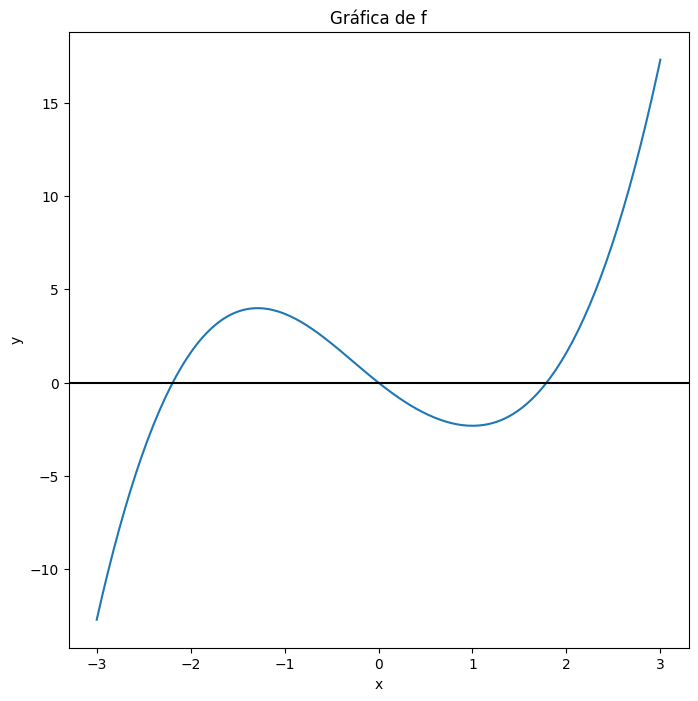

In [10]:

xmin = -3
xmax = 3
xs = np.linspace(xmin, xmax,200)
ys = f(xs)
plt.figure(figsize=(8,8))
plt.plot(xs, ys)
plt.title('Gráfica de f')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(color='k')
plt.show()

Podemos acotar las raíces en intervalos disjuntos: [-3,-1.5], [-1,1] y [1.5,2.5]

In [11]:
biseccion(f,-3,-1),biseccion(f,-1,1),biseccion(f,1,3),

((-2.1914238929748535, 4.76837158203125e-07),
 (-4.76837158203125e-07, 4.76837158203125e-07),
 (1.7882342338562012, 4.76837158203125e-07))

 - Una raíz es claramente negativa, porque está en el intervalo [-3,-1.5]
 - Otra raíz es claramente positiva, porque está en el intervalo [1.5, 2.5]
 - La otra es muy pequeña (menor que xtol), podría ser 0... y comprobamos a mano que 0 es una raíz exacta de `f`.
 

### Ejercicio

Empaqueta el método de bisección como una función con entradas:

 - Una función `f` continua
 - Los extremos de un intervalo `a` y `b`.
 - Una tolerancia para el error `xtol`

y salidas

 - Si `f(a)*f(b)>0`, se rompe y no devuelve nada (imprime un mensaje de error, lanza una "excepción", etc)
 - Si `f(a)*f(b)<=0`, devuelve un valor que dista de la raíz de `f` menos que `xtol` y un array con todas las acotaciones del error.

In [12]:
def biseccion_full_output(f,a,b,xtol=1e-6):
    xleft,xright = a,b
    j = 1
    sleft  = np.sign(f(xleft))
    sright = np.sign(f(xright))
    # si no hay cambio de signo, lanzamos una excepción
    if sleft == sright:
        raise Exception('No hay cambio de signo => no se puede usar el método de bisección')
    errores = []
    while xright - xleft > xtol:
        errores.append((xright - xleft)/2)
        xmed = (xleft + xright)/2
        smed = np.sign(f(xmed))
        if smed==sleft:
            xleft = xmed
        else:
            xright = xmed
        j = j + 1
    # devolvemos una estimación de la raíz y una estimación del error
    return (xleft + xright)/2, np.array(errores)


In [13]:
x,errores = biseccion_full_output(f,1,3)
errores

array([1.00000000e+00, 5.00000000e-01, 2.50000000e-01, 1.25000000e-01,
       6.25000000e-02, 3.12500000e-02, 1.56250000e-02, 7.81250000e-03,
       3.90625000e-03, 1.95312500e-03, 9.76562500e-04, 4.88281250e-04,
       2.44140625e-04, 1.22070312e-04, 6.10351562e-05, 3.05175781e-05,
       1.52587891e-05, 7.62939453e-06, 3.81469727e-06, 1.90734863e-06,
       9.53674316e-07])

### Ejercicio

Utilizando la función que has construido en el ejercicio anterior, representa gráficamente el error $e_n$ cometido en cada iteración y el cociente $e_{n+1}/e_n$ con el método de la bisección aplicado a la función:

$$
f(x) = x + \frac{1}{2}\sin(x) -1,\quad \text{ con } a=-4, \; b=4.
$$

In [14]:
def f(x):
    return x + 0.5*np.sin(x) - 1

a, b = -4, 4

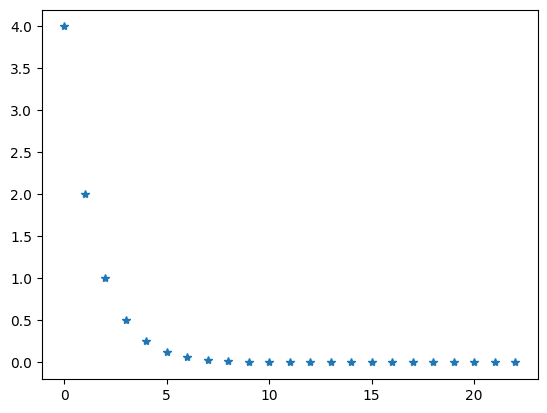

In [15]:
x,errores = biseccion_full_output(f,a,b)
# el error es la diferencia (en valor absoluto) entre la aproximación y nuestra mejor aproximación
plt.plot(errores, '*')

In [ ]:
cocientes_errores = errores[1:]/errores[:-1]
plt.plot(cocientes_errores, '*')

### Ejercicio

 - Busca una función de la librería `scipy.optimize` que implementa el algoritmo de bisección, compara sus argumentos, la forma de reportar el resultado y su comportamiento en caso de argumentos incorrectos con la función que has creado un poco más arriba.
 - Compara el resultado de esta función con la tuya en uno de los ejemplos anteriores.
 
Os recomendamos usar los dos métodos principales para encontrar información sobre una librería:
 - Buscar en la documentación de la librería:
     + si ya hemos importado `scipy.optimize`, escribimos `scipy.optimize.` y pulsando el tabulador muestra los métodos de esa librería. Podemos escribir algunas letras para limitar la búsqueda a los métodos que empiezan con `b`, por ejemplo.
     + Una interrogación al final de un identificador, por ejemplo `scipy.optimize.bisect?`, muestra la ayuda sobre ese objeto.
 - Buscar en internet, por ejemplo _"scipy bisection method"_.

In [16]:
from scipy.optimize import bisect
bisect?

Signature:
bisect(
    f,
    a,
    b,
    args=(),
    xtol=2e-12,
    rtol=8.881784197001252e-16,
    maxiter=100,
    full_output=False,
    disp=True,
)
Docstring:
Find root of a function within an interval using bisection.

Basic bisection routine to find a zero of the function `f` between the
arguments `a` and `b`. `f(a)` and `f(b)` cannot have the same signs.
Slow but sure.

Parameters
----------
f : function
    Python function returning a number.  `f` must be continuous, and
    f(a) and f(b) must have opposite signs.
a : scalar
    One end of the bracketing interval [a,b].
b : scalar
    The other end of the bracketing interval [a,b].
xtol : number, optional
    The computed root ``x0`` will satisfy ``np.allclose(x, x0,
    atol=xtol, rtol=rtol)``, where ``x`` is the exact root. The
    parameter must be nonnegative.
rtol : number, optional
    The computed root ``x0`` will satisfy ``np.allclose(x, x0,
    atol=xtol, rtol=rtol)``, where ``x`` is the exact root. The
    param

In [17]:
bisect(f,-3,3), biseccion(f,-3,3)

(0.6840366566780176, (0.6840366125106812, 3.5762786865234375e-07))

In [18]:
bisect(f,-3,3, full_output=True)

(0.6840366566780176,
       converged: True
            flag: 'converged'
  function_calls: 44
      iterations: 42
            root: 0.6840366566780176)

In [19]:
raiz, errores = biseccion_full_output(f,-3,3, xtol=2e-12)
len(errores)

42

## Método de la secante

El método de la secante, al igual que el método de la bisección, arranca eligiendo dos puntos $x_0,x_1$ que intuimos son una buena aproximación de la raíz $x_*$ de la ecuación

$$
f(x)=0
$$

que queremos encontrar. Pero, al contrario que en el método de la bisección, la raíz no tiene por qué estar en el intervalo $[x_0,x_1]$.

El algoritmo produce una sucesión de aproximaciones $x_2,x_3,\dots,x_n$ a la raíz del siguiente modo:

- Elegimos como $x_2$ la raíz de la recta que pasa por $(x_0, f(x_0))$ y $(x_1,f(x_1))$. En otras palabras, reemplazamos $f$ por su *interpolación lineal* (hablaremos de esto en el siguiente capítulo) por los puntos $x_0$ y $x_1$. Dicha recta tiene por ecuación:

$$
y = \left(\frac{f(x_1) - f(x_0)}{x_1-x_0}\right) (x - x_1) + f(x_1).
$$

Su raíz es el valor de $x$ que cumple

$$
y=0=\left(\frac{f(x_1) - f(x_0)}{x_1-x_0}\right) (x - x_1) + f(x_1),
$$

por tanto,

$$
x_2:= x_1 - \frac{f(x_1)}{f(x_1)-f(x_0)}(x_1-x_0).
$$

- En general, para $n\geq$ calculamos $x_n$ a partir de $x_{n-1}$ y $x_{n-2}$:

$$
x_n:= x_{n-1} - \frac{f(x_{n-1})}{f(x_{n-1})-f(x_{n-2})}(x_{n-1}-x_{n-2}).
$$


Ventajas:
 - Cuando converge, lo hace más deprisa que el método de la secante.
 
Inconvenientes:
 - No siempre converge.

### Ejercicio

Implementa el método de la secante:
 - ¿Qué argumentos necesita?
 - ¿Qué criterio de parada vas a elegir?
 

In [20]:
def secante(f, x0, x1, ytol=1e-6):
    # Mientras no se cumpla el criterio de parada
    # Usamos el criterio de parada en la y: comprobamos si y=f(x) es lo 
    #  bastante pequeño (ya que buscamos que f(x) sea 0)
    while np.abs(f(x1))>ytol:
        # Calcula nuevo punto
        x2 = x1 - f(x1)*(x1-x0)/(f(x1) - f(x0))
        # Avanzamos, descartando el punto más antiguo, incorporando el nuevo
        x0,x1 = x1,x2
    return x1

secante(f,0,1)

0.6840366568610154

## Método de la *regula falsi* o falsa posición

- Es una combinación del método de la bisección y de la secante. 
- Es idéntico al método de la bisección; pero en lugar de elegir el punto medio del intervalo, elegimos la raíz de la recta secante a la gráfica de la función por los extremos del intervalo.

Este método no se usa apensa, pero esta filosofía da lugar a los **métodos híbridos** que se utilizan en la práctica, como el **método de Brent**.

## Método del punto fijo

Este método consiste en escribir la ecuación

$$
f(x)=0,
$$

en la forma

$$
x=g(x);
$$

un punto que verifica la ecuación anterior es un **punto fijo** de la función $g$.

No todas las funciones tienen puntos fijos, pero hay dos casos en que podemos garantizar que es así:

- Si $g:[a,b]\rightarrow [a,b]$ (la función $g$ manda cualquier punto del intervalo $[a,b]$ en otro punto del *mismo* intervalo $[a,b]$) es una función continua entonces $g$ tiene un punto fijo en el intervalo $[a,b]$.
- Si $g:[a,b]\rightarrow [a,b]$ **y además** 
$$
|g'(x)|\leq k < 1, \quad\text{para cualquier } x \text{ en } [a,b], 
$$ 
entonces hay un único punto fijo en el intervalo $[a,b]$.


En el ejemplo anterior, la ecuación

$$
f(x) = x + \frac{1}{2}\sin(x) -1=0,
$$

se puede escribir como:

$$
x=1-0.5\, \sin(x), 
$$

que tiene la estructura de ecuación de punto fijo con 

$$
g(x)= 1-0.5\, \sin(x).
$$

El método del punto fijo consiste en:

 - comenzar con una aproximación (grosera) $x_0$ del punto fijo, bien elegida al azar, o construida por otros métodos (bisección, por ejemplo).
 - construir aproximaciones sucesivas de la forma:

$$
x_{n+1}=g(x_n),
$$
 - hasta que la diferencia entre $x_n$ y $x_{n+1}$ es más pequeña que nuestra tolerancia.


Si $g'(x)$, la derivada de $g$, es pequeña cerca del punto fijo (esto quiere decir que $g(x)$ no tiene variaciones abruptas cerca del punto fijo), entonces las aproximaciones $x_n$ se van acercando al punto fijo a medida que $n$ crece.

Más precisamente: 
- si $x_*=g(x_*)$ y $|g'(x)|<1$ para $x$ variando dentro de un intervalo $(x_*-\delta,x_*+\delta)$, 
- la primera aproximación $x_0$ se encuentra en ese mismo intervalo $(x_*-\delta,x_*+\delta)$,

entonces el error:

$$
e_n=x_n-x_*
$$

tiende a cero cuando n$\to\infty$. 

## Error del método de punto fijo

Además, 

$$
\frac{|e_{n+1}|}{|e_n|}\to |g'(x_*)|,\quad \text{ cuando }n\to \infty.
$$

En otras palabras, 

$$
|e_{n+1}|\approx |g'(x_*)| |e_n|.
$$

Además, 

$$
|e_n|=|x_n-x_*|=|g(x_{n-1})-g(x_*)|=\underbrace{|g'(\zeta_n)|}_{\zeta_n\text{ entre }x_{n-1}\text{ y }x_*}|x_{n-1}-x_*|\leq k|e_{n-1}|,
$$

de lo que se deduce que:

$$
|e_n|\leq k^n |e_0|. 
$$

Por otra parte,

$$
|x_{n+1}-x_n|=|g(x_n)-g(x_{n-1})|=\underbrace{|g'(\zeta_n)|}_{\zeta_n\text{ entre }x_n\text{ y }x_{n-1}}|x_{n}-x_{n-1}|.
$$

Aplicando esto $n$ veces obtenemos:

$$
|x_{n+1}-x_n|=|g(x_n)-g(x_{n-1})|\leq k|x_{n}-x_{n-1}|\leq\dots\leq k^n |x_1-x_0|,
$$

de lo que se deduce, con un poco más de esfuerzo (pregunta si no te sale), que 
$$
|e_n|< \frac{k^n}{1-k}|x_1-x_0|.
$$


### Convergencia cuadrádica

¿Qué ocurre cuando $|g'(x_*)|=0$?

En este caso, la velocidad de convergencia es mayor. Para ver por qué, procedemos como antes; pero en esta ocasión hacemos un desarrollo de Taylor de $g(x)$ en $x=x_*$ hasta orden dos:

$$
e_{n+1} = x_{n+1}-x_*=g(x_n) - g(x_*) = g'(x_*)(x_n - x_*)+ \underbrace{\frac{g''(\zeta_n)}{2}}_{\zeta_n\text{ entre }x_n \text{ y }x_{*}}(x_n-x_*)^2;
$$

como $g'(x_*)=0$ esto implica:

$$
e_{n+1} = \frac{g''(\zeta_n)}{2}(e_n)^2.
$$

Por tanto, si $e_n$ converge a cero se cumple

$$
\frac{e_{n+1}}{(e_n)^2}\to \frac{|g''(x_*)|}{2},\quad \text{ cuando } n\to\infty.
$$

En otras palabras, $e_n$ va a cero cuadráticamente:

$$
|e_{n+1}|\approx \frac{|g''(x_*)|}{2} |e_n|^2.
$$

Ventajas:
- Es fácil de implementar.

Inconvenientes:
- No hay garantía de que la elección que hagamos de $x_0$ de lugar a una sucesión de aproximaciones de el punto fijo $x_*$. Incluso cuando $|g'(x)|<1$ en un entorno de $x_*$ uno tiene que asegurarse de que $x_0$ está lo suficientemente cerca de $x_*$.
- Si $|g'(x_*)|>1$ las aproximaciones **no convergen**.

### Ejercicio

Empaqueta el método de del punto fijo como una función con entradas:

 - Una función `g` continua
 - Una aproximación inicial `x_O`
 - Un número máximo de iteraciones `N`
 - Una tolerancia para el error `tol` (parámetro opcional, por defecto `1.e-6`)

y salidas

 - Si se llega al número de iteraciones `N`, o el valor absoluto de `x-g(x)` es menor que `tol` se devuelve la última iteración.

In [21]:
def puntofijo(g, x0, maxiters=100, tol=1e-6):
    n = 0
    while np.abs(g(x0) - x0) > tol and n < maxiters:
        x0 = g(x0)
        n += 1
    return x0

In [22]:
def g(x):
    return 1 - 0.5*np.sin(x)
puntofijo(g, 1)

0.6840371349839628

### Ejercicio

Sea $f(x) = x - e^{-x}$, vamos a resolver $f(x) = 0$

- Escribiéndola como la ecuación de punto fijo $x = e^{-x}$ ($x = g(x)$ con $g(x) = e^{-x}$).
- Escribiéndola como la ecuación de punto fijo $x = -\ln x$.

Comprueba que ambas formulaciones son equivalentes.

Utiliza el método de punto fijo para cada una de las formulaciones, utilizando varias aproximaciones iniciales ¿Podrías explicar lo que sucede? 

In [23]:
def f(x):
    return x - np.exp(-x)
secante(f, 1, 0)

0.56714332795002

In [24]:
def g(x):
    return np.exp(-x)
puntofijo(g, 1)

0.5671437480994115

In [25]:
def h(x):
    return -np.log(x)
puntofijo(h, 1)

/var/folders/ht/nmlm6qw16hx4x9q5nqw2y3l40000gn/T/ipykernel_97183/1459175727.py:2: RuntimeWarning: divide by zero encountered in log
  return -np.log(x)
/var/folders/ht/nmlm6qw16hx4x9q5nqw2y3l40000gn/T/ipykernel_97183/1459175727.py:2: RuntimeWarning: invalid value encountered in log
  return -np.log(x)


-inf

> El método de punto fijo para h hace h(1)=0, y después h(0) = -log(0), que es -inf, y el método no puede continuar haciendo h(-inf)
> Partiendo de otro punto inicial distinto, la iteración también termina visitando los números negativos, no se puede aplicar el logaritmo, y el método se detiene.

In [26]:
puntofijo(h, 10)

/var/folders/ht/nmlm6qw16hx4x9q5nqw2y3l40000gn/T/ipykernel_97183/1459175727.py:2: RuntimeWarning: invalid value encountered in log
  return -np.log(x)


-2.302585092994046

## Método de Newton

Nuevamente, vamos a resolver una ecuación de la forma

$$
f(x)=0.
$$

Si tomamos una aproximación $x_n$, es poco probable que $f(x_n)=0$.  No obstante, uno puede esperar que exista una corrección $\delta_n$ de forma que
$$x_{n+1} = x_n + \delta_n$$
satisfaga
$$
    f(x_{n+1}) = 0. 
$$

Hagamos una expansión de Taylor en torno a $x_n$: 

$$
    f(x_n + \delta_n) =  f(x_n) + f'(x_n) \delta_n  + O((\delta_n)^2).
$$

Si sustituimos por esta expresión en $f(x_{n+1})=0$ y despreciamos los términos cuadráticos en $\delta_n^2$ llegamos a:

$$
    f(x_n) + f'(x_n) \delta_n  =0;
$$

Despejando, obtenemos:

$$
\delta_n=-\frac{f(x_n)}{f'(x_n)}.
$$

Por tanto,

$$
x_{n+1} = x_n -\frac{f(x_n)}{f'(x_n)}.
$$

## Error en el método de Newton

El método de Newton puede interpretarse como una iteración de punto fijo
$$
x=g(x)
$$
asociada a la función
$$
g(x)=x - \frac{f(x)}{f'(x)}.
$$
Un cálculo inmediato muestra que, siempre que $f'(x)\neq 0$ y exista la segunda derivada $f''(x)$ se tiene:
$$
g'(x)=\frac{f(x)f''(x)}{(f'(x))^2}.
$$


Así pues, si $f(x_*)=0$ entonces $g'(x_*)=0$. Hemos visto que el error 
$$
e_n=x_n-x_*
$$
entonces satisface
$$
\frac{e_{n+1}}{e_n}\to 0, \quad\text{ cuando } n\to \infty.
$$

Esto quiere decir que $e_{n+1}$ es mucho más pequeño que $e_n$ (para el método de punto fijo teníamos que $e_{n+1}$ era asintóticamente proporcional proporcional a $e_n$, siendo el factor de proporcionalidad el valor de la derivada en $x_*$).

Esto se puede precisar, de hecho:

$$
\frac{|e_{n+1|}}{|e_n|^2}\to c, \quad\text{ cuando } n\to \infty
$$

para cierta constante $c \geq 0$.

Decimos que el orden de convergencia del método es **cuadrático**, mucho más rápido que en el caso de la bisección o el punto fijo (en ese caso el orden es **lineal**).

No obstante no podemos a priori saber si el método converge o no. Para ello la iteración inicial $x_0$ debe estar suficientemente cerca de la raíz exacta $x_*$, y se tiene que verificar la condición
$$
|g'(x)|=\left|\frac{f(x)f''(x)}{(f'(x))^2}\right|<1,
$$
en el intervalo cuyos extremos son $x_0$ y $x_*$. Esto es difícil de comprobar en la práctica.

## Implementación del método de Newton

Como no tenemos garantía de éxito, debemos programar nuestro método de forma defensiva. Si escribimos por ejemplo:
```python
def metodo_newton(f, fp, x0, ytol):
    x = x0
    error = np.abs(f(x))
    while error > ytol:
        x = x - f(x)/fp(x)
        error = np.abs(f(x))
    return x
```
nos encontraremos en un bucle infinito siempre que el método no converja.

Una forma de evitar este problema es imponer un máximo de iteraciones usando un contador:
```python
def metodo_newton(f, fp, x0, ytol, maxiter=100):
    x = x0
    error = np.abs(f(x))
    k = 0 #contador
    #el bucle se detiene cuando se consiga la precisión deseada,
    #  pero también termina prematuramente si
    #  se alcanza el máximo de iteraciones
    while error > ytol and k<maxiter:
        x = x - f(x)/fp(x)
        error = np.abs(f(x))
        k = k + 1
    return x
```

En la definición anterior hemos usado el __criterio de parada__ $|f(x_n)|<ytol$.

El otro criterio de parada habitual es $|x_{n+1}-x_n|<xtol$ (o utilizando el error relativo: $|x_{n+1}-x_n|<rtol|x_n|$).

El código que corresponde a ese criterio de parada es:

```python
def metodo_newton(f, fp, x0, xtol, maxiter=100):
    x = x0
    #Comenzamos con un error infinito, simplemente para que
    #la ejecución del programa no se detenga antes de empezar
    errorx = np.inf
    k = 0 #contador
    #el bucle se detiene cuando se consiga la precisión deseada,
    #  pero también termina prematuramente si
    #  se alcanza el máximo de iteraciones
    while error > xtol and k<maxiter:
        xnew = x - f(x)/fp(x)
        error = np.abs(xnew - x)
        x = xnew
        k = k + 1
    return x
```

Finalmente, ya que no hay garantías de éxito, es interesante devolver no sólo nuestra estimación de la raíz, sino nuestra estimación de la precisión obtenida:

```python
def metodo_newton(f, fp, x0, xtol, maxiter=100):
    x = x0
    #Comenzamos con un error infinito, simplemente para que
    #la ejecución del programa no se detenga antes de empezar
    errorx = np.inf
    k = 0 #contador
    #el bucle se detiene cuando se consiga la precisión deseada,
    #  pero también termina prematuramente si
    #  se alcanza el máximo de iteraciones
    while errorx > xtol and k<maxiter:
        xnew = x - f(x)/fp(x)
        errorx = np.abs(xnew - x)
        x = xnew
        k = k + 1
    return x, errorx
```

In [27]:
def metodo_newton(f, fp, x0, xtol, maxiter=100):
    x = x0
    #Comenzamos con un error infinito, simplemente para que
    #la ejecución del programa no se detenga antes de empezar
    errorx = np.inf
    k = 0 #contador
    #el bucle se detiene cuando se consiga la precisión deseada,
    #  pero también termina prematuramente si
    #  se alcanza el máximo de iteraciones
    while errorx > xtol and k<maxiter:
        xnew = x - f(x)/fp(x)
        errorx = np.abs(xnew - x)
        x = xnew
        k = k + 1
    return x, errorx

In [28]:
f = lambda x: x**2-2
fp = lambda x: 2*x

# 2 iteraciones son insuficientes para conseguir la precisión deseada
print(metodo_newton(f,fp, 1, 1e-8, 2))
# 10 iteraciones sí son suficientes para conseguir la precisión deseada
# La estimación del error es mejor que la precisión mínima que le pedimos
print(metodo_newton(f,fp, 1, 1e-8, 10))
print(metodo_newton(f,fp, 1, 1e-8, 100))

(1.4166666666666667, 0.08333333333333326)
(1.4142135623730951, 1.5947243525715749e-12)
(1.4142135623730951, 1.5947243525715749e-12)


### Calcular derivadas mediante cálculo simbólico

Para el método de Newton, y para muchos otros, es necesario poder evaluar la derivada de una función. Nuestras opciones son:
 - Podemos calcular la derivada a mano, aunque:
     + es fácil equivocarse si el cálculo es largo.
     + no se puede automatizar: al cambiar la función hay que derivar de nuevo.
 - Podemos usar derivación numérica, de la que hablaremos más adelante.
 - Podemos usar cálculo simbólico, que siempre consigue calcular la derivada de una función. Es fácil encontrar ejemplos en internet: ¿conseguirás ser el primero en subir un ejemplo al foro? Los profesores comentarán después tu solución...
 - Podemos buscar otro método que no necesite el cálculo de la derivada. De entre los métodos que hemos visto: ¿cuál es el método que más se parece al método de Newton y que no necesita el cálculo de la derivada?

### Ejercicio

 - Escribe la documentación (_'docstring'_) de la función `metodo_newton`.
 - Compara el método de Newton con el de bisección en los ejemplos anteriores. Constata la importancia de una buena primera aproximación. Compara el número de iteraciones necesarias para conseguir la misma precisión con uno y otro método.

In [29]:
def metodo_newton(f, fp, x0, xtol, maxiter=100):
    '''Aproxima una raíz de una ecuación no lineal mediante el método de Newton
    
    Argumentos:
     - f  : función f:R -> R
     - fp : la derivada de la función anterior
     - x0 : aproximación inicial a la raíz
     - xtol : tolerancia para el criterio de la |xn1 - xn| < xtol
     - maxiter : el método se detendrá después de maxiter iteraciones
                 aunque no se haya alcanzado un error menor que la tolerancia
                 
    Devuelve:
     - x: estimación de la raíz
     - errorx: estimación del error cometido
    '''
    x = x0
    #Comenzamos con un error infinito, simplemente para que
    #la ejecución del programa no se detenga antes de empezar
    errorx = np.inf
    k = 0 #contador
    #el bucle se detiene cuando se consiga la precisión deseada,
    #  pero también termina prematuramente si
    #  se alcanza el máximo de iteraciones
    while errorx > xtol and k<maxiter:
        xnew = x - f(x)/fp(x)
        errorx = np.abs(xnew - x)
        x = xnew
        k = k + 1
    return x, errorx

In [30]:
metodo_newton(f, fp, 1, 1e-9)

(1.4142135623730951, 1.5947243525715749e-12)

> Para comparar el número de iteraciones tenemos que devolver el número de iteraciones, así que modificamos `newton` para que devuelva también el número de iteraciones

In [31]:
def newton_more_output(f, fp, x0, xtol, maxiter=100):
    '''Aproxima una raíz de una ecuación no lineal mediante el método de Newton
    
    Argumentos:
     - f  : función f:R -> R
     - fp : la derivada de la función anterior
     - x0 : aproximación inicial a la raíz
     - xtol : tolerancia para el criterio de la |xn1 - xn| < xtol
     - maxiter : el método se detendrá después de maxiter iteraciones
                 aunque no se haya alcanzado un error menor que la tolerancia
                 
    Devuelve:
     - x: estimación de la raíz
     - errorx: estimación del error cometido
     - k : número de iteraciones del método
    '''
    x = x0
    #Comenzamos con un error infinito, simplemente para que
    #la ejecución del programa no se detenga antes de empezar
    errorx = np.inf
    k = 0 #contador
    #el bucle se detiene cuando se consiga la precisión deseada,
    #  pero también termina prematuramente si
    #  se alcanza el máximo de iteraciones
    while errorx > xtol and k<maxiter:
        xnew = x - f(x)/fp(x)
        errorx = np.abs(xnew - x)
        x = xnew
        k = k + 1
    return x, errorx, k

In [32]:
newton_more_output(f, fp, 1, 1e-9)

(1.4142135623730951, 1.5947243525715749e-12, 5)

In [33]:
raiz, errores = biseccion_full_output(f,1,2,xtol=1e-9)
print(raiz, len(errores))

1.4142135619185865 30


> - La dependencia respecto de la aproximación inicial es importante, no sólo afecta al número de iteraciones, sino que podemos terminar en una u otra raíz:

In [34]:
newton_more_output(f, fp, 10, 1e-9)

(1.4142135623730951, 2.220446049250313e-16, 8)

In [35]:
newton_more_output(f, fp, -1, 1e-9)

(-1.4142135623730951, 1.5947243525715749e-12, 5)

In [36]:
newton_more_output(f, fp, 100, 1e-9)

(1.4142135623730951, 7.4495964952348e-13, 11)

In [37]:
newton_more_output(f, fp, 0.01, 1e-9)

(1.4142135623730951, 7.460698725481052e-13, 12)

> - La dependencia respecto de la tolerancia es débil, porque una sóla iteración disminuye el error drásticamente:

In [38]:
for exponent in range(2,12):
    print(': tolerancia 1e-%d'%exponent)
    print(newton_more_output(f, fp, 100, 10**(-exponent)))

: tolerancia 1e-2
(1.4142150140500531, 0.0020263179888906357, 9)
: tolerancia 1e-3
(1.41421356237384, 1.4516762130156735e-06, 10)
: tolerancia 1e-4
(1.41421356237384, 1.4516762130156735e-06, 10)
: tolerancia 1e-5
(1.41421356237384, 1.4516762130156735e-06, 10)
: tolerancia 1e-6
(1.4142135623730951, 7.4495964952348e-13, 11)
: tolerancia 1e-7
(1.4142135623730951, 7.4495964952348e-13, 11)
: tolerancia 1e-8
(1.4142135623730951, 7.4495964952348e-13, 11)
: tolerancia 1e-9
(1.4142135623730951, 7.4495964952348e-13, 11)
: tolerancia 1e-10
(1.4142135623730951, 7.4495964952348e-13, 11)
: tolerancia 1e-11
(1.4142135623730951, 7.4495964952348e-13, 11)


### Ejercicio

Aplica ahora el método de Newton para resolver la ecuación:

$$
    f(x) = x^2 + x - \sin(x)=0
$$

Toma por ejemplo como aproximación inicial $x_0=0.9$. Compara la velocidad a la que el error tiende a cero para este ejemplo y los ejemplos anteriores. ¿Observas alguna diferencia? ¿A qué puede ser debido esto?

Para estudiar la velocidad a la que el error va a cero
 - modificamos el código de newton para que nos devuelva la lista de aproximaciones
 - en este caso concreto es fácil comprobar que la raíz es 0, así que podemos calcular la aproximación al error. Sin embargo, en otros ejemplos no tenemos una expresión cerrada para la raíz, así que tomamos la última aproximación a la raíz (con una tolerancia muy pequeña) como el valor definitivo, y medimos la distancia a esa raíz como nuestra aproximación al error. No podemos usar la última aproximación pq nuestra estimación del error sería cero.
 - hacemos una gráfica del error, y del cociente de errores $e_{n+1}/e_n$

In [49]:
def metodo_newton_full_output(f, fp, x0, xtol, maxiter=100):
    '''Aproxima una raíz de una ecuación no lineal mediante el método de Newton
    
    Argumentos:
     - f  : función f:R -> R
     - fp : la derivada de la función anterior
     - x0 : aproximación inicial a la raíz
     - xtol : tolerancia para el criterio de la |xn1 - xn| < xtol
     - maxiter : el método se detendrá después de maxiter iteraciones
                 aunque no se haya alcanzado un error menor que la tolerancia
                 
    Devuelve:
     - x: estimación de la raíz
     - aproxs: todas las aproximaciones a la raíz
     - k : número de iteraciones del método
    '''
    x = x0
    aproxs = [x0]
    errorx = np.inf
    k = 0 #contador
    #el bucle se detiene cuando se consiga la precisión deseada,
    #  pero también termina prematuramente si
    #  se alcanza el máximo de iteraciones
    while errorx > xtol and k<maxiter:
        xnew = x - f(x)/fp(x)
        errorx = np.abs(xnew - x)
        x = xnew
        aproxs.append(x)
        k = k + 1
    return x, np.array(aproxs), k

Comprobamos el código para la función $f(x)=x-e^{-x}$ de antes, que tiene una raíz simple.

In [1]:
def f(x):
    return x - np.exp(-x)
def fp(x):
    return 1 + np.exp(-x)


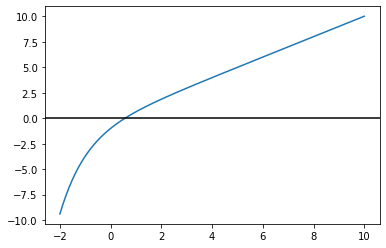

In [7]:
xs = np.linspace(-2,10,200)
plt.plot(xs, f(xs))
plt.axhline(color='k');

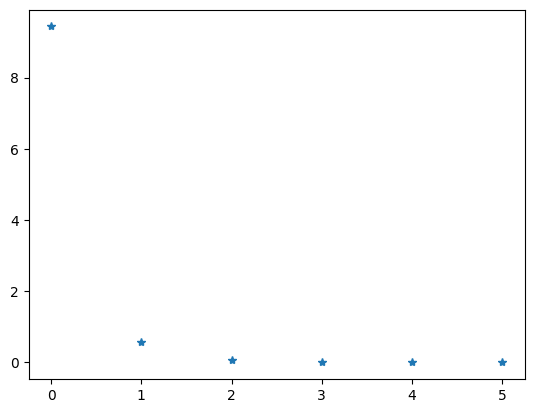

In [51]:
x, aproxs, k = metodo_newton_full_output(f, fp, 10, 1e-9)
# No usamos el último error, porque la diferencia entre x y la última aproximación es 0
errors = np.abs(aproxs[:-1]-x)
plt.plot(errors, '*')

Para comprobar que el error cumple 

$$
\frac{e_{n+1}}{(e_n)^2}\to c>0,\quad n\to\infty,
$$

conviene tomar el logaritmo $\log(e_n)$, que cumple:

$$
\log(e_{n+1}) \approx \log(c) + 2\log(e_n).
$$

Si descartáramos $c$, cualquier sucesión que cumple esta recurrencia es proporcional a $2^n$. 

Comparamos ahora el logaritmo del error a $2^n$.

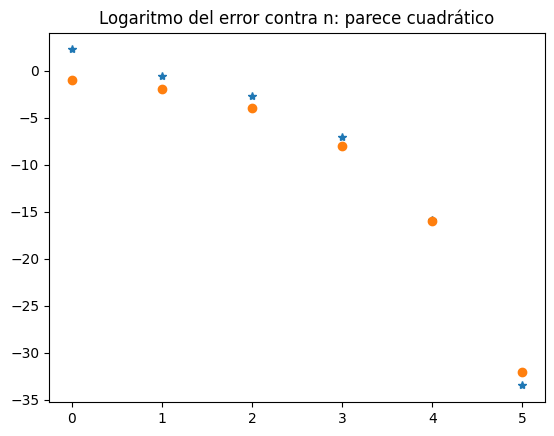

In [54]:
plt.title('Logaritmo del error contra n: parece cuadrático')
plt.plot(np.log(errors), '*')
dos = [-2**n for n in range(len(errors))]
ene = [n for n in range(len(errors))]
plt.plot(ene,dos,'o')


Probamos ahora con la función del enunciado:

In [43]:
def f(x):
    return x**2 + x -np.sin(x)
def fp(x):
    return 2*x + 1 - np.cos(x)
x0 = 0.9

In [44]:
x, aproxs, k = metodo_newton_full_output(f, fp, x0, 1e-9)
# La auténtica raíz es 0
x

9.510199706532907e-10

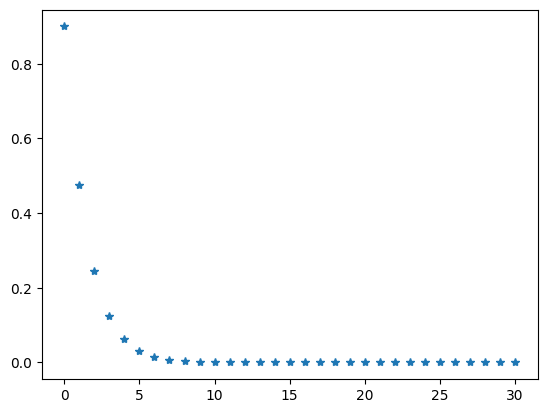

In [45]:
# Error es la distancia a 0
errors = np.abs(aproxs-0)
plt.plot(errors, '*')

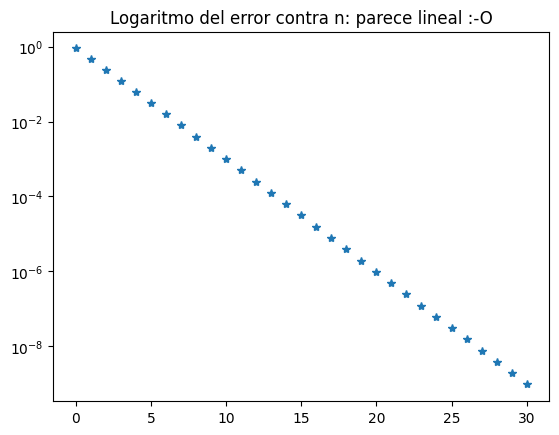

In [46]:
plt.title('Logaritmo del error contra n: parece lineal :-O')
plt.semilogy(errors, '*')

> Observamos la gráfica por si nos da pistas...

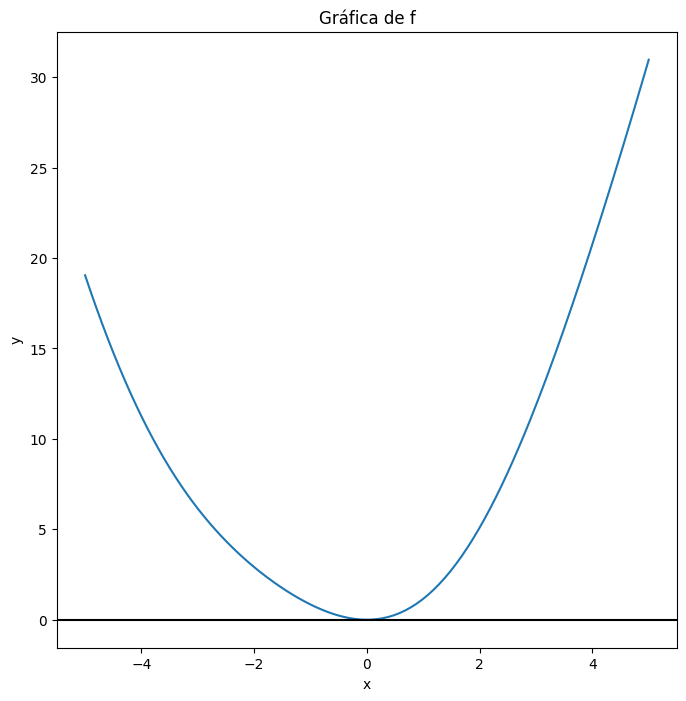

In [47]:
xmin = -5
xmax = 5
xs = np.linspace(xmin, xmax,200)
ys = f(xs)
plt.figure(figsize=(8,8))
plt.plot(xs, ys)
plt.title('Gráfica de f')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(color='k')
plt.show()

> - y vemos que no es una raíz simple, porque $f'(0)=0$. El método de bisección ni siquiera podría encontrar esta raíz. El método de Newton lo consigue, pero se rompe la convergencia cuadrática...

## Resumen: métodos de Newton y Secante en una variable

 - El método de **Newton** busca raíces de f(x), iterando 
$$x_{n+1}=x_{n} - \frac{f(x_n)}{f'(x_{n})}$$
    - Es una iteración de punto fijo, con $g(x) = x - f(x)/f'(x)$.
    - No es fácil saber si convergerá... pero cuando lo hace es de orden 2
    - Hay que evaluar la derivada
 - El método de la **secante** es similar al de Newton, salvo porque se sustituye la derivada $f'(x)$ por el cociente incremental:
$$
f'(x_n)\approx \frac{f(x_{n})-f(x_{n-1})}{x_{n}-x_{n-1}}.
$$
El método resultante es: 
$$x_{n+1}=x_{n} - \frac{f(x_n)\left(x_{n}-x_{n-1}\right)}{f(x_{n})-f(x_{n-1})}$$
    - No hay que evaluar la derivada
    - El orden de convergencia es algo menor (investiga en internet cuál es el orden).

Los métodos de Newton y Secante tienen diferencias cualitativas con el método de bisección:
 - no tenemos un intervalo que acota la raíz, sino un punto que la aproxima.
 - no tenemos una cota teórica del error entre el punto $x_n$ y la raíz, a menos que se verifiquen las condiciones de convergencia y podamos acotar la segunda derivada. Tenemos dos soluciones:
     + evaluar el error en la 'y': la diferencia entre $f(x)$ y $0$.
     + estimar el error en la 'x' comparando $x_n$ con $x_{n+1}$.
 - si no conseguimos verificar las hipótesis de los teoremas de convergencia (en particular acotando $f''$), no tenemos garantía de éxito.

### Ejercicio

 - Busca los métodos oficiales de newton y secante en `scipy.optimize`. Compara las decisiones tomadas y prueba uno y otro método en algún ejemplo concreto.
 - Compara el método de la secante con el de Newton para calcular la raices cuadradas. Compara el número de iteraciones necesarias para conseguir la misma precisión con uno y otro método.

> - Una búsqueda nos llevará a una de las dos funciones que implementan el método de la secante: https://duckduckgo.com/?q=scipy+secant+method

In [ ]:
from scipy.optimize import newton

In [ ]:
def f(x):
    return x - np.exp(-x)
def fp(x):
    return 1 + np.exp(-x)
x0,x1 = 2,1

In [ ]:
newton?

In [ ]:
newton(f, x0=x0, x1=x1, full_output=True)

In [ ]:
secante(f, x0, x1)

In [ ]:
x, aproxs, k = metodo_newton_full_output(f, fp, x0, 1e-9)
x, aproxs, k

In [ ]:
newton(f, x0=x0, fprime=fp, full_output=True)

> - Para `secante`, nosotros usamos la tolerancia en la y, pero scipy la tolerancia en la x
> - Para `secante`, nosotros no ofrecemos la posibilidad de devolver el output completo
> - Para `newton`, usamos el mismo criterio de parada, y el resultado es idéntico, aunque devolvemos el output completo en otro formato, y devolvemos todas las aproximaciones mientras que scipy devuelve un resumen.


### Ejercicio

 - ¿Podrías estimar numéricamente el orden de convergencia del método de la secante? Es decir, encontrar (mediante experimentos numéricos) qué número $\gamma>0$ cumple que
 $$
 \frac{|e_{n+1}|}{|e_n|^\gamma}\to m>0,\quad \text{cuando }n\to\infty
 $$
siempre que la iteración converja.
Para ello, transformamos el problema y usamos el método de regresión (ajuste por mínimos cuadrados) que habéis practicado en algunos laboratorios.
   * En vez de buscar los valores $\gamma, m$, tales que $\frac{|e_{n+1}|}{|e_n|^\gamma}$ es aproximadamente $m$, tomamos logaritmos, y buscamos los valores $\gamma, m$, tales que $log(\frac{|e_{n+1}|}{|e_n|^\gamma})$ es aproximadamente $log(m)$.
   * Concretamos la idea anterior de la forma siguiente: buscamos los valores $\gamma, m$, tales que 
$$\sum_n \left(\log\left(\frac{|e_{n+1}|}{|e_n|^\gamma}\right) - \log(m)\right)^2=
\sum_n \big(\log(|e_{n+1}|) - \left(\gamma \log(|e_n|) + \log(m)\right)\big)^2$$
     es lo más pequeño posible, y constatamos que se trata de un ajuste clásico por mínimos cuadrados.
   * Usamos `m,b=np.polyfit(xs, ys)` para encontrar los coeficientes del ajuste de mínimos cuadrados, donde `xs` es el array con los valores $\log(|e_n|)$, e `ys` es el array con los valores $\log(|e_{n+1}|)$, de modo que la recta de mínimos cuadrados es $\log(|e_{n+1}|) = m\cdot \log(|e_{n}|) + b$.
   * Después de estas manipulaciones, ¿cuál es un valor aproximado para $\gamma$?



In [ ]:
# Engordamos el output de `secante` para tener todas las aproximaciones.
def secante_full_output(f, x0, x1, ytol, maxiter=100):
    '''Aproxima una raíz de una ecuación no lineal mediante el método de la secante
    
    Argumentos:
     - f  : función f:R -> R
     - x0 : aproximación inicial a la raíz
     - x1 : otra aproximación a la raíz
     - xtol : tolerancia para el criterio de la |xn1 - xn| < xtol
     - maxiter : el método se detendrá después de maxiter iteraciones
                 aunque no se haya alcanzado un error menor que la tolerancia
                 
    Devuelve:
     - x: estimación de la raíz
     - aproxs: todas las aproximaciones a la raíz
    '''
    xn = x1
    xn_1 = x0
    j = 1
    aprox = [x0,x1]
    while abs(f(xn)) > ytol and j < maxiter :
        xnew = xn - f(xn)*(xn-xn_1)/(f(xn) - f(xn_1))
        xn_1, xn = xn, xnew
        j = j + 1
        aprox.append(xnew)
    if j>=maxiter:
        raise Exception('Error: no hemos encontrado la raiz después de %s iteraciones'%maxiter)
    return xn, np.array(aprox)

def f(x):
    return x**2+np.sin(x)-1

raiz, aprox = secante_full_output(f,-1,1,1e-15)
# No incluímos los dos primeros valores porque son arbitrarios
# No incluímos el último error porque defino el error como la distancia
#  al último valor, que es la mejor aproximación a la raíz que tengo :-/
en_1 = np.log(np.abs(aprox[1:-2]-raiz))
en = np.log(np.abs(aprox[2:-1]-raiz))
gamma, logc = np.polyfit(en_1, en, 1)
print('El valor encontrado para gamma es:', gamma, ' y la razón aúrea es:', (np.sqrt(5)+1)/2)
xs = np.linspace(min(en_1)-1,max(en_1)+1,100)
ys = xs*gamma + logc
plt.title('El valor encontrado para gamma es %.3f'%gamma)
plt.plot(xs,ys)
plt.plot(en_1, en, '*')